In [133]:
import pandas as pd
import numpy as np
from numpy.random import seed
import statistics

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
seed(100)

In [135]:
df = pd.read_csv('./DATA/online_transaction_dataset_processed.csv')
attr = df.columns.tolist()
np.transpose(attr)

array(['Unnamed: 0', 'Administrative', 'Administrative_Duration',
       'Informational', 'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='<U23')

In [136]:
df.head()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,9,1,1,1,1,0,0,0
1,1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,9,2,2,1,2,0,0,0
2,3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,9,3,2,2,4,0,0,0
3,4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,9,3,3,1,4,0,1,0
4,5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,9,2,2,1,3,0,0,0


In [137]:
df['Revenue'].value_counts()

Revenue
0    10375
1     1908
Name: count, dtype: int64

In [138]:
df['Month'].value_counts()

Month
0    3357
1    2995
2    1884
3    1727
4     549
5     448
6     433
7     431
8     288
9     171
Name: count, dtype: int64

In [139]:
attr[1:len(attr)]

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

In [140]:
df[attr[1:len(attr)]].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,9,1,1,1,1,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,9,2,2,1,2,0,0,0
2,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,9,3,2,2,4,0,0,0
3,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,9,3,3,1,4,0,1,0
4,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,9,2,2,1,3,0,0,0


In [141]:
np.transpose(attr[1:len(attr)]), attr[len(attr)-1]

(array(['Administrative', 'Administrative_Duration', 'Informational',
        'Informational_Duration', 'ProductRelated',
        'ProductRelated_Duration', 'BounceRates', 'ExitRates',
        'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
        'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
       dtype='<U23'),
 'Revenue')

In [142]:
attr[len(attr)-1]

'Revenue'

In [143]:
df[attr[len(attr)-1]].value_counts()

Revenue
0    10375
1     1908
Name: count, dtype: int64

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 

In [145]:
attr[1:len(attr)-1]

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [146]:
X1 = df[attr[1:len(attr)-1]].values
X = StandardScaler().fit(X1).transform(X1)
df[attr[1:len(attr)-1]] = X

df.head()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,-0.698907,-0.458238,-0.397247,-0.245408,-0.692875,-0.625962,3.738726,3.281565,-0.317845,-0.309031,3.102389,-1.233236,-0.790241,-0.893929,-0.763172,-0.401915,-0.551171,0
1,1,-0.698907,-0.458238,-0.397247,-0.245408,-0.670413,-0.592556,-0.455574,1.196568,-0.317845,-0.309031,3.102389,-0.136361,-0.207896,-0.893929,-0.514741,-0.401915,-0.551171,0
2,3,-0.698907,-0.458238,-0.397247,-0.245408,-0.670413,-0.624570,0.593001,2.030567,-0.317845,-0.309031,3.102389,0.960513,-0.207896,-0.477589,-0.017879,-0.401915,-0.551171,0
3,4,-0.698907,-0.458238,-0.397247,-0.245408,-0.490717,-0.298432,-0.036144,0.154069,-0.317845,-0.309031,3.102389,0.960513,0.374450,-0.893929,-0.017879,-0.401915,1.814319,0
4,5,-0.698907,-0.458238,-0.397247,-0.245408,-0.288559,-0.545467,-0.124445,-0.376325,-0.317845,-0.309031,3.102389,-0.136361,-0.207896,-0.893929,-0.266310,-0.401915,-0.551171,0


In [147]:
x_tr, x_t, y_tr, y_t = train_test_split(df[attr[1:len(attr)-1]], df['Revenue'], test_size=0.4, random_state=100)

In [148]:
x_tr.shape, x_t.shape, y_tr.shape, y_t.shape

((7369, 17), (4914, 17), (7369,), (4914,))

In [149]:
#clf = GradientBoostingClassifier()
clf = RandomForestClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)

In [150]:
print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      4172
           1       0.72      0.56      0.63       742

    accuracy                           0.90      4914
   macro avg       0.82      0.76      0.79      4914
weighted avg       0.89      0.90      0.90      4914



In [151]:
print(confusion_matrix(y_t, y_p))

[[4011  161]
 [ 326  416]]


In [152]:
clf_prob = clf.predict_proba(x_t)

In [153]:
clf_probability = clf_prob[:,1]
clf_probability

array([0.76, 0.  , 0.  , ..., 0.04, 0.02, 0.09])

In [154]:
df_prob = pd.DataFrame({'clf_prob': clf_probability})

In [155]:
df_prob['clf_prob'].value_counts()

clf_prob
0.00    1037
0.01     575
0.02     404
0.03     308
0.04     231
        ... 
0.78       5
0.97       4
0.99       2
1.00       2
0.98       1
Name: count, Length: 101, dtype: int64

In [156]:
clf_fpr, clf_tpr, _ = roc_curve(y_t, clf_probability)  
nc_fpr, nc_trp, _ = roc_curve(y_t, np.zeros(len(y_t)))

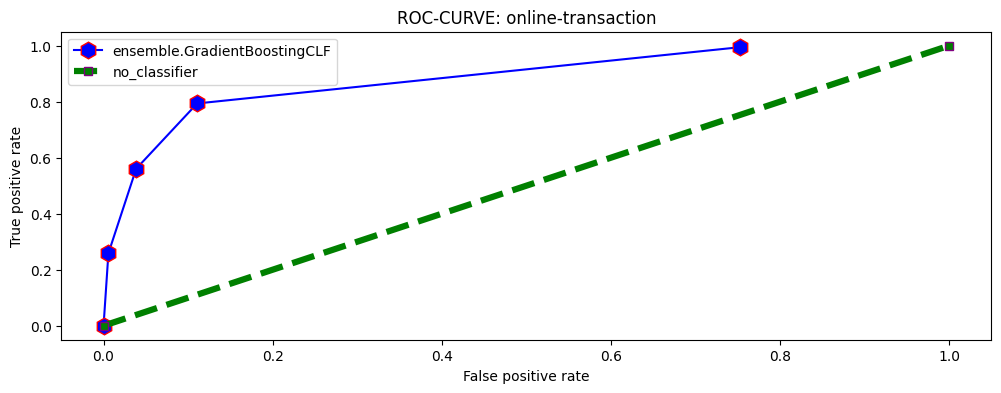

In [157]:
plt.figure(figsize=(12,4))
plt.plot(clf_fpr[::25], clf_tpr[::25], 
         color='blue', label='RandomForestClassifier',
         marker='h', markeredgecolor='red',
         markersize=12)
plt.plot(nc_fpr, nc_trp, 
         color='green', label='no_classifier',
         marker='s', markeredgecolor='purple',
         linestyle='--', linewidth=4.5)
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC-CURVE: online-transaction')
plt.show()

In [158]:
df_p = pd.DataFrame({'y_t': y_t, 'y_p': y_p})

In [159]:
df_p['y_t'].value_counts()

y_t
0    4172
1     742
Name: count, dtype: int64

In [160]:
print(confusion_matrix(y_t, y_p))

[[4011  161]
 [ 326  416]]


In [161]:
recall = confusion_matrix(y_t, y_p)[1][1]/(confusion_matrix(y_t, y_p)[1][1]+confusion_matrix(y_t, y_p)[1][0])
np.round(recall, 2)

0.56

In [162]:
precision = confusion_matrix(y_t, y_p)[1][1]/(confusion_matrix(y_t, y_p)[1][1]+confusion_matrix(y_t, y_p)[0][1])
precision

0.7209705372616985

In [163]:
f1_score = statistics.harmonic_mean([recall,precision])
np.round(f1_score, 2)

0.63

In [164]:
print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      4172
           1       0.72      0.56      0.63       742

    accuracy                           0.90      4914
   macro avg       0.82      0.76      0.79      4914
weighted avg       0.89      0.90      0.90      4914



In [165]:
AREA_ROC = np.trapz(clf_tpr, clf_fpr)
AREA_ROC

0.9180380110762807

In [166]:
print('Area under the ROC_CURVE : ', AREA_ROC)

Area under the ROC_CURVE :  0.9180380110762807
